In [1]:
import geopandas as gpd
from sqlalchemy import create_engine
from geopy.geocoders import Nominatim
from MyCreds.mycreds import Capstone_AWS_SG
import timeit

In [34]:
# pathname = "/search-results?33-Telok-Blangah-Way-Bukit-Merah-Singapore%103.82243971608177%1.2741913500000002%2-Room%245"
# pathname = "/search-results3-Telok-Blangah-Way-Bukit-Merah-Singapore%103.82243971608177%1.2741913500000002%2-Room%245"
pathname = "/search-results/288B-Compassvale-Crescent-Singapore-Singapore%103.89773725348837%1.3984599000000002%5-Room%116"

In [35]:
search_params_from_url = pathname.strip("/search-results/").split("%")

address = search_params_from_url[0]
lon = search_params_from_url[1]
lat = search_params_from_url[2]
flat_type = search_params_from_url[3]
sq_m = search_params_from_url[4]

In [36]:
print(f"{address}, {lon}, {lat}, {flat_type}, {sq_m}")

288B-Compassvale-Crescent-Singapore-Singapore, 103.89773725348837, 1.3984599000000002, 5-Room, 116


In [2]:
geolocator = Nominatim(user_agent="http://127.0.0.1:8050/")
location = geolocator.geocode("33 TELOK BLANGAH WAY Singapore", namedetails=True)

In [3]:
location.raw

{'place_id': 141959935,
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright',
 'osm_type': 'way',
 'osm_id': 172093874,
 'boundingbox': ['1.2737727', '1.2744256', '103.8220025', '103.8226569'],
 'lat': '1.2741913500000002',
 'lon': '103.82243971608177',
 'display_name': '33, Telok Blangah Way, Radin Mas, Bukit Merah, Singapore, Central, 099840, Singapore',
 'class': 'building',
 'type': 'residential',
 'importance': 0.5209999999999999,
 'namedetails': {}}

In [4]:
location.raw['display_name'].split(', ')[3]

'Bukit Merah'

In [5]:
location.raw

{'place_id': 141959935,
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright',
 'osm_type': 'way',
 'osm_id': 172093874,
 'boundingbox': ['1.2737727', '1.2744256', '103.8220025', '103.8226569'],
 'lat': '1.2741913500000002',
 'lon': '103.82243971608177',
 'display_name': '33, Telok Blangah Way, Radin Mas, Bukit Merah, Singapore, Central, 099840, Singapore',
 'class': 'building',
 'type': 'residential',
 'importance': 0.5209999999999999,
 'namedetails': {}}

In [6]:
location.address

'33, Telok Blangah Way, Radin Mas, Bukit Merah, Singapore, Central, 099840, Singapore'

In [7]:
location.latitude

1.2741913500000002

In [8]:
location.longitude

103.82243971608177

In [9]:
location = geolocator.geocode("33 TELOK BLANGAH WAY")
location.address

'33, Telok Blangah Way, Radin Mas, Bukit Merah, Singapore, Central, 099840, Singapore'

In [10]:
features = ['building_id',
            'geometry',
            'storey_range_min',
            'storey_range_max',
            'n_rooms',
            'floor_area_sqm',
            'remaining_lease_years',
            'num_preschools_400m',
            'num_preschools_1km',
            'num_primary_schools_1km',
            'score_primary_schools_1km',
            'num_primary_schools_2km',
            'score_primary_schools_2km',
            'num_secondary_schools_1km',
            'score_secondary_schools_1km',
            'num_secondary_schools_2km',
            'score_secondary_schools_2km',
            'num_healthcare_2km',
            'num_healthcare_5km',
            'nearest_healthcare_clinc',
            'nearest_police',
            'nearest_fire',
            'num_maj_parks_1km',
            'num_maj_parks_2km',
            'nearest_maj_park',
            'num_min_parks_1km',
            'num_min_parks_2km',
            'nearest_min_park',
            'num_waterbodies_100m',
            'num_waterbodies_500m',
            'nearest_waterbody',
            'num_supermarket_1_5km',
            'nearest_supermarket',
            'num_wetmarket_1_5km',
            'nearest_wetmarket',
            'nearest_expressway',
            'nearest_expressway_entrance_exit',
            'num_busstops_100m',
            'num_busstops_400m',
            'nearest_busstop',
            'num_taxistands_100m',
            'num_taxistands_400m',
            'nearest_taxistand',
            'num_transit_stations_1_5km',
            'score_stations_1_5km',
            'nearest_transit_station',
            'num_transit_exits_100m',
            'num_transit_exits_400m',
            'dist_to_nearest_transit_exit',
            'num_malls_1_5km',
            'nearest_mall',
            'num_hawker_1_5km',
            'nearest_hawker',
            'dist_to_central_business_district',
            'dist_to_holland_village',
            'dist_to_dempsey_hill',
            'dist_to_serangoon_gardens_circus',
            'dist_to_orchard',
            'dist_to_arab_street',
            'dist_to_thomson_ridge',
            'dist_to_east_coast_park',
            'dist_to_bishan_park',
            'dist_to_botanic_gardens',
            'dist_to_hort_park',
            'dist_to_sentosa',
            'dist_to_gardens_by_the_bay',
            'dist_to_con_area_id_1',
            'dist_to_con_area_id_2',
            'dist_to_con_area_id_3',
            'dist_to_con_area_id_4',
            'dist_to_con_area_id_5',
            'dist_to_con_area_id_6',
            'dist_to_con_area_id_7',
            'dist_to_con_area_id_8',
            'dist_to_con_area_id_9',
            'dist_to_con_area_id_10',
            'dist_to_con_area_id_11',
            'dist_to_con_area_id_12',
            'dist_to_con_area_id_13',
            'dist_to_con_area_id_14',
            'dist_to_con_area_id_15',
            'dist_to_con_area_id_16',
            'dist_to_con_area_id_17',
            'dist_to_con_area_id_18',
            'dist_to_con_area_id_19',
            'dist_to_con_area_id_20',
            'dist_to_con_area_id_21',
            'dist_to_con_area_id_22',
            'dist_to_con_area_id_23',
            'dist_to_con_area_id_24',
            'dist_to_con_area_id_25',
            'dist_to_con_area_id_26',
            'dist_to_con_area_id_27',
            'dist_to_con_area_id_28',
            'dist_to_con_area_id_29',
            'dist_to_con_area_id_30',
            'dist_to_con_area_id_31',
            'dist_to_con_area_id_32',
            'dist_to_con_area_id_33',
            'dist_to_con_area_id_34',
            'dist_to_con_area_id_35',
            'dist_to_con_area_id_36',
            'dist_to_con_area_id_37',
            'dist_to_con_area_id_38',
            'dist_to_con_area_id_39',
            'dist_to_con_area_id_40',
            'dist_to_con_area_id_41',
            'dist_to_con_area_id_42',
            'dist_to_con_area_id_43',
            'dist_to_con_area_id_44',
            'dist_to_con_area_id_45',
            'dist_to_con_area_id_46',
            'dist_to_con_area_id_47',
            'dist_to_con_area_id_48',
            'dist_to_con_area_id_49',
            'dist_to_con_area_id_50',
            'dist_to_con_area_id_51',
            'dist_to_con_area_id_52',
            'dist_to_con_area_id_53',
            'dist_to_con_area_id_54',
            'dist_to_con_area_id_55',
            'dist_to_con_area_id_56',
            'dist_to_con_area_id_57',
            'dist_to_con_area_id_58',
            'dist_to_con_area_id_59',
            'dist_to_con_area_id_60',
            'dist_to_con_area_id_61',
            'dist_to_con_area_id_62',
            'dist_to_con_area_id_63',
            'dist_to_con_area_id_64',
            'dist_to_con_area_id_65',
            'dist_to_con_area_id_66',
            'dist_to_con_area_id_67',
            'dist_to_con_area_id_68',
            'dist_to_con_area_id_69',
            'dist_to_con_area_id_70',
            'dist_to_con_area_id_71',
            'dist_to_con_area_id_72',
            'dist_to_con_area_id_73',
            'dist_to_con_area_id_74',
            'dist_to_con_area_id_75',
            'dist_to_con_area_id_76',
            'dist_to_con_area_id_77',
            'dist_to_con_area_id_78',
            'dist_to_con_area_id_79',
            'dist_to_con_area_id_80',
            'dist_to_con_area_id_81',
            'dist_to_con_area_id_82',
            'dist_to_con_area_id_83',
            'dist_to_con_area_id_84',
            'dist_to_con_area_id_85',
            'dist_to_con_area_id_86',
            'dist_to_con_area_id_87',
            'dist_to_con_area_id_88',
            'dist_to_con_area_id_89',
            'dist_to_con_area_id_90',
            'dist_to_con_area_id_91',
            'dist_to_con_area_id_92',
            'dist_to_con_area_id_93',
            'dist_to_con_area_id_94',
            'dist_to_con_area_id_95',
            'dist_to_con_area_id_96',
            'dist_to_con_area_id_97',
            'dist_to_con_area_id_98',
            'dist_to_con_area_id_99',
            'dist_to_con_area_id_100',
            'dist_to_con_area_id_101',
            'dist_to_con_area_id_102',
            'dist_to_con_area_id_103',
            'dist_to_con_area_id_104',
            'dist_to_con_area_id_105',
            'dist_to_con_area_id_106',
            'dist_to_con_area_id_107',
            'dist_to_con_area_id_108',
            'dist_to_con_area_id_109',
            'dist_to_con_area_id_110',
            'dist_to_con_area_id_111',
            'dist_to_con_area_id_112',
            'dist_to_con_area_id_113',
            'dist_to_con_area_id_114',
            'dist_to_con_area_id_115',
            'dist_to_con_area_id_116',
            'dist_to_con_area_id_117',
            'dist_to_con_area_id_118',
            'dist_to_con_area_id_119',
            'dist_to_con_area_id_120',
            'dist_to_con_area_id_249',
            'dist_to_con_area_id_250',
            'dist_to_con_area_id_251',
            'dist_to_con_area_id_252',
            'dist_to_con_area_id_253',
            'dist_to_con_area_id_254',
            'dist_to_con_area_id_121',
            'dist_to_con_area_id_122',
            'dist_to_con_area_id_123',
            'dist_to_con_area_id_124',
            'dist_to_con_area_id_125',
            'dist_to_con_area_id_126',
            'dist_to_con_area_id_127',
            'dist_to_con_area_id_128',
            'dist_to_con_area_id_129',
            'dist_to_con_area_id_130',
            'dist_to_con_area_id_131',
            'dist_to_con_area_id_132',
            'dist_to_con_area_id_133',
            'dist_to_con_area_id_134',
            'dist_to_con_area_id_135',
            'dist_to_con_area_id_136',
            'dist_to_con_area_id_137',
            'dist_to_con_area_id_138',
            'dist_to_con_area_id_139',
            'dist_to_con_area_id_140',
            'dist_to_con_area_id_141',
            'dist_to_con_area_id_142',
            'dist_to_con_area_id_143',
            'dist_to_con_area_id_144',
            'dist_to_con_area_id_145',
            'dist_to_con_area_id_146',
            'dist_to_con_area_id_147',
            'dist_to_con_area_id_148',
            'dist_to_con_area_id_149',
            'dist_to_con_area_id_150',
            'dist_to_con_area_id_151',
            'dist_to_con_area_id_152',
            'dist_to_con_area_id_153',
            'dist_to_con_area_id_154',
            'dist_to_con_area_id_155',
            'dist_to_con_area_id_156',
            'dist_to_con_area_id_157',
            'dist_to_con_area_id_158',
            'dist_to_con_area_id_159',
            'dist_to_con_area_id_160',
            'dist_to_con_area_id_161',
            'dist_to_con_area_id_162',
            'dist_to_con_area_id_163',
            'dist_to_con_area_id_164',
            'dist_to_con_area_id_165',
            'dist_to_con_area_id_166',
            'dist_to_con_area_id_167',
            'dist_to_con_area_id_168',
            'dist_to_con_area_id_169',
            'dist_to_con_area_id_170',
            'dist_to_con_area_id_171',
            'dist_to_con_area_id_172',
            'dist_to_con_area_id_173',
            'dist_to_con_area_id_174',
            'dist_to_con_area_id_175',
            'dist_to_con_area_id_176',
            'dist_to_con_area_id_177',
            'dist_to_con_area_id_178',
            'dist_to_con_area_id_179',
            'dist_to_con_area_id_180',
            'dist_to_con_area_id_181',
            'dist_to_con_area_id_182',
            'dist_to_con_area_id_183',
            'dist_to_con_area_id_184',
            'dist_to_con_area_id_185',
            'dist_to_con_area_id_186',
            'dist_to_con_area_id_187',
            'dist_to_con_area_id_188',
            'dist_to_con_area_id_189',
            'dist_to_con_area_id_190',
            'dist_to_con_area_id_191',
            'dist_to_con_area_id_192',
            'dist_to_con_area_id_193',
            'dist_to_con_area_id_194',
            'dist_to_con_area_id_195',
            'dist_to_con_area_id_196',
            'dist_to_con_area_id_197',
            'dist_to_con_area_id_198',
            'dist_to_con_area_id_199',
            'dist_to_con_area_id_200',
            'dist_to_con_area_id_201',
            'dist_to_con_area_id_202',
            'dist_to_con_area_id_203',
            'dist_to_con_area_id_204',
            'dist_to_con_area_id_205',
            'dist_to_con_area_id_206',
            'dist_to_con_area_id_207',
            'dist_to_con_area_id_208',
            'dist_to_con_area_id_209',
            'dist_to_con_area_id_210',
            'dist_to_con_area_id_211',
            'dist_to_con_area_id_212',
            'dist_to_con_area_id_213',
            'dist_to_con_area_id_214',
            'dist_to_con_area_id_215',
            'dist_to_con_area_id_216',
            'dist_to_con_area_id_217',
            'dist_to_con_area_id_218',
            'dist_to_con_area_id_219',
            'dist_to_con_area_id_220',
            'dist_to_con_area_id_221',
            'dist_to_con_area_id_222',
            'dist_to_con_area_id_223',
            'dist_to_con_area_id_224',
            'dist_to_con_area_id_225',
            'dist_to_con_area_id_226',
            'dist_to_con_area_id_227',
            'dist_to_con_area_id_228',
            'dist_to_con_area_id_229',
            'dist_to_con_area_id_230',
            'dist_to_con_area_id_231',
            'dist_to_con_area_id_232',
            'dist_to_con_area_id_233',
            'dist_to_con_area_id_234',
            'dist_to_con_area_id_235',
            'dist_to_con_area_id_236',
            'dist_to_con_area_id_237',
            'dist_to_con_area_id_238',
            'dist_to_con_area_id_239',
            'dist_to_con_area_id_240',
            'dist_to_con_area_id_241',
            'dist_to_con_area_id_242',
            'dist_to_con_area_id_243',
            'dist_to_con_area_id_244',
            'dist_to_con_area_id_245',
            'dist_to_con_area_id_246',
            'dist_to_con_area_id_247',
            'dist_to_con_area_id_248',
            ]

In [11]:
f"""select {", ".join(features)},
st_setsrid(st_makepoint(103.82243971608177, 1.2741913500000002), 4326)::geography <-> geometry::geography as distance
from resale_location_features
order by distance asc, month desc
limit 1;"""

'select building_id, geometry, storey_range_min, storey_range_max, n_rooms, floor_area_sqm, remaining_lease_years, num_preschools_400m, num_preschools_1km, num_primary_schools_1km, score_primary_schools_1km, num_primary_schools_2km, score_primary_schools_2km, num_secondary_schools_1km, score_secondary_schools_1km, num_secondary_schools_2km, score_secondary_schools_2km, num_healthcare_2km, num_healthcare_5km, nearest_healthcare_clinc, nearest_police, nearest_fire, num_maj_parks_1km, num_maj_parks_2km, nearest_maj_park, num_min_parks_1km, num_min_parks_2km, nearest_min_park, num_waterbodies_100m, num_waterbodies_500m, nearest_waterbody, num_supermarket_1_5km, nearest_supermarket, num_wetmarket_1_5km, nearest_wetmarket, nearest_expressway, nearest_expressway_entrance_exit, num_busstops_100m, num_busstops_400m, nearest_busstop, num_taxistands_100m, num_taxistands_400m, nearest_taxistand, num_transit_stations_1_5km, score_stations_1_5km, nearest_transit_station, num_transit_exits_100m, num_

In [12]:
location.longitude

103.82243971608177

In [13]:
start_time = timeit.default_timer()

sql = f"""select {", ".join(features)},
st_setsrid(st_makepoint({location.longitude}, {location.latitude}), 4326)::geography <-> geometry::geography as distance
from resale_location_features
order by distance asc, month desc
limit 1;"""

engine = create_engine(f'postgresql+psycopg2://{Capstone_AWS_SG.username}:{Capstone_AWS_SG.password}@{Capstone_AWS_SG.host}/Capstone', echo=False)

with engine.connect() as cnxn:
    df = gpd.read_postgis(sql, cnxn, geom_col='geometry')

end_time = timeit.default_timer()
total = end_time - start_time
total

34.361047541999994

In [14]:
df

,building_id,geometry,storey_range_min,storey_range_max,n_rooms,floor_area_sqm,remaining_lease_years,num_preschools_400m,num_preschools_1km,num_primary_schools_1km,...,dist_to_con_area_id_240,dist_to_con_area_id_241,dist_to_con_area_id_242,dist_to_con_area_id_243,dist_to_con_area_id_244,dist_to_con_area_id_245,dist_to_con_area_id_246,dist_to_con_area_id_247,dist_to_con_area_id_248,distance
0,4460,POINT (103.82249 1.27414),7,9,3,59.0,53,4,15,2,...,1120.507797,2380.622723,3665.326516,4146.282375,3945.161633,4574.279782,4418.27051,3267.40523,1885.321475,7.765815


In [40]:
towns_dict = {'town_bedok': 0,
              'town_bishan': 0,
              'town_bukit_batok': 0,
              'town_bukit_merah': 0,
              'town_bukit_panjang': 0,
              'town_bukit_timah': 0,
              'town_central_area': 0,
              'town_choa_chu_kang': 0,
              'town_clementi': 0,
              'town_geylang': 0,
              'town_hougang': 0,
              'town_jurong_east': 0,
              'town_jurong_west': 0,
              'town_kallang_whampoa': 0,
              'town_lim_chu_kang': 0,
              'town_marine_parade': 0,
              'town_pasir_ris': 0,
              'town_punggol': 0,
              'town_queenstown': 0,
              'town_sembawang': 0,
              'town_sengkang': 0,
              'town_serangoon': 0,
              'town_tampines': 0,
              'town_toa_payoh': 0,
              'town_woodlands': 0,
              'town_yishun': 0,
              'flat_type_2_room': 0,
              'flat_type_3_room': 0,
              'flat_type_4_room': 0,
              'flat_type_5_room': 0,
              'flat_type_executive': 0,
              'flat_type_multi_generation': 0
              }

In [ ]:
# others

town_bedok, town_bishan, town_bukit_batok, town_bukit_merah, town_bukit_panjang,
town_bukit_timah, town_central_area, town_choa_chu_kang, town_clementi, town_geylang, town_hougang,
town_jurong_east, town_jurong_west, town_kallang_whampoa, town_lim_chu_kang, town_marine_parade, town_pasir_ris,
town_punggol, town_queenstown, town_sembawang, town_sengkang, town_serangoon, town_tampines, town_toa_payoh,
town_woodlands, town_yishun, flat_type_2_room, flat_type_3_room, flat_type_4_room, flat_type_5_room,
flat_type_executive, flat_type_multi_generation

In [41]:
flat_type = "2 Room"
if flat_type != 1:
    # If flat_type isn't 1 bedroom add 1 to which town the address is in
    town_key = f"town_{location.raw['display_name'].split(', ')[3].lower().replace(' ', '_')}"
    if town_key in towns_dict.keys():
        towns_dict[town_key] = 1
    if flat_type:
        towns_dict[f"flat_type_{flat_type.lower().replace(' ', '_')}"] = 1

    # for town in towns:
    #     if town.strip('town_') == location.raw['display_name'].split(', ')[3].lower().replace(' ', '_'):
    #         towns_dict[town] = 1
    # Add 1 to which flat_type


In [42]:
towns_dict

{'town_bedok': 0,
 'town_bishan': 0,
 'town_bukit_batok': 0,
 'town_bukit_merah': 1,
 'town_bukit_panjang': 0,
 'town_bukit_timah': 0,
 'town_central_area': 0,
 'town_choa_chu_kang': 0,
 'town_clementi': 0,
 'town_geylang': 0,
 'town_hougang': 0,
 'town_jurong_east': 0,
 'town_jurong_west': 0,
 'town_kallang_whampoa': 0,
 'town_lim_chu_kang': 0,
 'town_marine_parade': 0,
 'town_pasir_ris': 0,
 'town_punggol': 0,
 'town_queenstown': 0,
 'town_sembawang': 0,
 'town_sengkang': 0,
 'town_serangoon': 0,
 'town_tampines': 0,
 'town_toa_payoh': 0,
 'town_woodlands': 0,
 'town_yishun': 0,
 'flat_type_2_room': 1,
 'flat_type_3_room': 0,
 'flat_type_4_room': 0,
 'flat_type_5_room': 0,
 'flat_type_executive': 0,
 'flat_type_multi_generation': 0}

In [22]:
import pandas as pd

In [25]:
df.merge(pd.DataFrame(towns_dict, index=[0]), right_index=True, left_index=True)

,building_id,geometry,storey_range_min,storey_range_max,n_rooms,floor_area_sqm,remaining_lease_years,num_preschools_400m,num_preschools_1km,num_primary_schools_1km,...,town_pasir_ris,town_punggol,town_queenstown,town_sembawang,town_sengkang,town_serangoon,town_tampines,town_toa_payoh,town_woodlands,town_yishun
0,4460,POINT (103.82249 1.27414),7,9,3,59.0,53,4,15,2,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
flat_types_dict = {'flat_type_2_room': 0, 'flat_type_3_room': 0, 'flat_type_4_room': 0, 'flat_type_5_room': 0,
              'flat_type_executive': 0, 'flat_type_multi_generation': 0}



In [29]:
f"town_{location.raw['display_name'].split(', ')[3].lower().replace(' ', '_')}"

'town_bukit_merah'

In [34]:
'town_bishan' in towns_dict.keys()

True

In [43]:
flat_type = "2 Room"
flat_type = "Executive"
flat_type = "Multi Generation"
sq_m = 244
f"flat_type_{flat_type.lower().replace(' ', '_')}"

'flat_type_multi_generation'

In [47]:
f"""Search Results:  \n[{location.address}](/search-results?{location.longitude}%{location.latitude}%{flat_type.replace(' ', '-')}%{sq_m})"""

'Search Results:  [33, Telok Blangah Way, Radin Mas, Bukit Merah, Singapore, Central, 099840, Singapore](/search-results?103.82243971608177%1.2741913500000002%Multi-Generation%244)'

In [48]:
url = "/search-results?103.82243971608177%1.2741913500000002%Multi-Generation%244"

In [50]:
url.split("?")[1].split("%")

['103.82243971608177', '1.2741913500000002', 'Multi-Generation', '244']

In [37]:
features = ['building_id',
            'geometry',
            'month',
            'storey_range_min',
            'storey_range_max',
            'n_rooms',
            'floor_area_sqm',
            'remaining_lease_years',
            'num_preschools_400m',
            'num_preschools_1km',
            'num_primary_schools_1km',
            'score_primary_schools_1km',
            'num_primary_schools_2km',
            'score_primary_schools_2km',
            'num_secondary_schools_1km',
            'score_secondary_schools_1km',
            'num_secondary_schools_2km',
            'score_secondary_schools_2km',
            'num_healthcare_2km',
            'num_healthcare_5km',
            'nearest_healthcare_clinc',
            'nearest_police',
            'nearest_fire',
            'num_maj_parks_1km',
            'num_maj_parks_2km',
            'nearest_maj_park',
            'num_min_parks_1km',
            'num_min_parks_2km',
            'nearest_min_park',
            'num_waterbodies_100m',
            'num_waterbodies_500m',
            'nearest_waterbody',
            'num_supermarket_1_5km',
            'nearest_supermarket',
            'num_wetmarket_1_5km',
            'nearest_wetmarket',
            'nearest_expressway',
            'nearest_expressway_entrance_exit',
            'num_busstops_100m',
            'num_busstops_400m',
            'nearest_busstop',
            'num_taxistands_100m',
            'num_taxistands_400m',
            'nearest_taxistand',
            'num_transit_stations_1_5km',
            'score_stations_1_5km',
            'nearest_transit_station',
            'num_transit_exits_100m',
            'num_transit_exits_400m',
            'dist_to_nearest_transit_exit',
            'num_malls_1_5km',
            'nearest_mall',
            'num_hawker_1_5km',
            'nearest_hawker',
            'dist_to_central_business_district',
            'dist_to_holland_village',
            'dist_to_dempsey_hill',
            'dist_to_serangoon_gardens_circus',
            'dist_to_orchard',
            'dist_to_arab_street',
            'dist_to_thomson_ridge',
            'dist_to_east_coast_park',
            'dist_to_bishan_park',
            'dist_to_botanic_gardens',
            'dist_to_hort_park',
            'dist_to_sentosa',
            'dist_to_gardens_by_the_bay',
            'dist_to_con_area_id_1',
            'dist_to_con_area_id_2',
            'dist_to_con_area_id_3',
            'dist_to_con_area_id_4',
            'dist_to_con_area_id_5',
            'dist_to_con_area_id_6',
            'dist_to_con_area_id_7',
            'dist_to_con_area_id_8',
            'dist_to_con_area_id_9',
            'dist_to_con_area_id_10',
            'dist_to_con_area_id_11',
            'dist_to_con_area_id_12',
            'dist_to_con_area_id_13',
            'dist_to_con_area_id_14',
            'dist_to_con_area_id_15',
            'dist_to_con_area_id_16',
            'dist_to_con_area_id_17',
            'dist_to_con_area_id_18',
            'dist_to_con_area_id_19',
            'dist_to_con_area_id_20',
            'dist_to_con_area_id_21',
            'dist_to_con_area_id_22',
            'dist_to_con_area_id_23',
            'dist_to_con_area_id_24',
            'dist_to_con_area_id_25',
            'dist_to_con_area_id_26',
            'dist_to_con_area_id_27',
            'dist_to_con_area_id_28',
            'dist_to_con_area_id_29',
            'dist_to_con_area_id_30',
            'dist_to_con_area_id_31',
            'dist_to_con_area_id_32',
            'dist_to_con_area_id_33',
            'dist_to_con_area_id_34',
            'dist_to_con_area_id_35',
            'dist_to_con_area_id_36',
            'dist_to_con_area_id_37',
            'dist_to_con_area_id_38',
            'dist_to_con_area_id_39',
            'dist_to_con_area_id_40',
            'dist_to_con_area_id_41',
            'dist_to_con_area_id_42',
            'dist_to_con_area_id_43',
            'dist_to_con_area_id_44',
            'dist_to_con_area_id_45',
            'dist_to_con_area_id_46',
            'dist_to_con_area_id_47',
            'dist_to_con_area_id_48',
            'dist_to_con_area_id_49',
            'dist_to_con_area_id_50',
            'dist_to_con_area_id_51',
            'dist_to_con_area_id_52',
            'dist_to_con_area_id_53',
            'dist_to_con_area_id_54',
            'dist_to_con_area_id_55',
            'dist_to_con_area_id_56',
            'dist_to_con_area_id_57',
            'dist_to_con_area_id_58',
            'dist_to_con_area_id_59',
            'dist_to_con_area_id_60',
            'dist_to_con_area_id_61',
            'dist_to_con_area_id_62',
            'dist_to_con_area_id_63',
            'dist_to_con_area_id_64',
            'dist_to_con_area_id_65',
            'dist_to_con_area_id_66',
            'dist_to_con_area_id_67',
            'dist_to_con_area_id_68',
            'dist_to_con_area_id_69',
            'dist_to_con_area_id_70',
            'dist_to_con_area_id_71',
            'dist_to_con_area_id_72',
            'dist_to_con_area_id_73',
            'dist_to_con_area_id_74',
            'dist_to_con_area_id_75',
            'dist_to_con_area_id_76',
            'dist_to_con_area_id_77',
            'dist_to_con_area_id_78',
            'dist_to_con_area_id_79',
            'dist_to_con_area_id_80',
            'dist_to_con_area_id_81',
            'dist_to_con_area_id_82',
            'dist_to_con_area_id_83',
            'dist_to_con_area_id_84',
            'dist_to_con_area_id_85',
            'dist_to_con_area_id_86',
            'dist_to_con_area_id_87',
            'dist_to_con_area_id_88',
            'dist_to_con_area_id_89',
            'dist_to_con_area_id_90',
            'dist_to_con_area_id_91',
            'dist_to_con_area_id_92',
            'dist_to_con_area_id_93',
            'dist_to_con_area_id_94',
            'dist_to_con_area_id_95',
            'dist_to_con_area_id_96',
            'dist_to_con_area_id_97',
            'dist_to_con_area_id_98',
            'dist_to_con_area_id_99',
            'dist_to_con_area_id_100',
            'dist_to_con_area_id_101',
            'dist_to_con_area_id_102',
            'dist_to_con_area_id_103',
            'dist_to_con_area_id_104',
            'dist_to_con_area_id_105',
            'dist_to_con_area_id_106',
            'dist_to_con_area_id_107',
            'dist_to_con_area_id_108',
            'dist_to_con_area_id_109',
            'dist_to_con_area_id_110',
            'dist_to_con_area_id_111',
            'dist_to_con_area_id_112',
            'dist_to_con_area_id_113',
            'dist_to_con_area_id_114',
            'dist_to_con_area_id_115',
            'dist_to_con_area_id_116',
            'dist_to_con_area_id_117',
            'dist_to_con_area_id_118',
            'dist_to_con_area_id_119',
            'dist_to_con_area_id_120',
            'dist_to_con_area_id_249',
            'dist_to_con_area_id_250',
            'dist_to_con_area_id_251',
            'dist_to_con_area_id_252',
            'dist_to_con_area_id_253',
            'dist_to_con_area_id_254',
            'dist_to_con_area_id_121',
            'dist_to_con_area_id_122',
            'dist_to_con_area_id_123',
            'dist_to_con_area_id_124',
            'dist_to_con_area_id_125',
            'dist_to_con_area_id_126',
            'dist_to_con_area_id_127',
            'dist_to_con_area_id_128',
            'dist_to_con_area_id_129',
            'dist_to_con_area_id_130',
            'dist_to_con_area_id_131',
            'dist_to_con_area_id_132',
            'dist_to_con_area_id_133',
            'dist_to_con_area_id_134',
            'dist_to_con_area_id_135',
            'dist_to_con_area_id_136',
            'dist_to_con_area_id_137',
            'dist_to_con_area_id_138',
            'dist_to_con_area_id_139',
            'dist_to_con_area_id_140',
            'dist_to_con_area_id_141',
            'dist_to_con_area_id_142',
            'dist_to_con_area_id_143',
            'dist_to_con_area_id_144',
            'dist_to_con_area_id_145',
            'dist_to_con_area_id_146',
            'dist_to_con_area_id_147',
            'dist_to_con_area_id_148',
            'dist_to_con_area_id_149',
            'dist_to_con_area_id_150',
            'dist_to_con_area_id_151',
            'dist_to_con_area_id_152',
            'dist_to_con_area_id_153',
            'dist_to_con_area_id_154',
            'dist_to_con_area_id_155',
            'dist_to_con_area_id_156',
            'dist_to_con_area_id_157',
            'dist_to_con_area_id_158',
            'dist_to_con_area_id_159',
            'dist_to_con_area_id_160',
            'dist_to_con_area_id_161',
            'dist_to_con_area_id_162',
            'dist_to_con_area_id_163',
            'dist_to_con_area_id_164',
            'dist_to_con_area_id_165',
            'dist_to_con_area_id_166',
            'dist_to_con_area_id_167',
            'dist_to_con_area_id_168',
            'dist_to_con_area_id_169',
            'dist_to_con_area_id_170',
            'dist_to_con_area_id_171',
            'dist_to_con_area_id_172',
            'dist_to_con_area_id_173',
            'dist_to_con_area_id_174',
            'dist_to_con_area_id_175',
            'dist_to_con_area_id_176',
            'dist_to_con_area_id_177',
            'dist_to_con_area_id_178',
            'dist_to_con_area_id_179',
            'dist_to_con_area_id_180',
            'dist_to_con_area_id_181',
            'dist_to_con_area_id_182',
            'dist_to_con_area_id_183',
            'dist_to_con_area_id_184',
            'dist_to_con_area_id_185',
            'dist_to_con_area_id_186',
            'dist_to_con_area_id_187',
            'dist_to_con_area_id_188',
            'dist_to_con_area_id_189',
            'dist_to_con_area_id_190',
            'dist_to_con_area_id_191',
            'dist_to_con_area_id_192',
            'dist_to_con_area_id_193',
            'dist_to_con_area_id_194',
            'dist_to_con_area_id_195',
            'dist_to_con_area_id_196',
            'dist_to_con_area_id_197',
            'dist_to_con_area_id_198',
            'dist_to_con_area_id_199',
            'dist_to_con_area_id_200',
            'dist_to_con_area_id_201',
            'dist_to_con_area_id_202',
            'dist_to_con_area_id_203',
            'dist_to_con_area_id_204',
            'dist_to_con_area_id_205',
            'dist_to_con_area_id_206',
            'dist_to_con_area_id_207',
            'dist_to_con_area_id_208',
            'dist_to_con_area_id_209',
            'dist_to_con_area_id_210',
            'dist_to_con_area_id_211',
            'dist_to_con_area_id_212',
            'dist_to_con_area_id_213',
            'dist_to_con_area_id_214',
            'dist_to_con_area_id_215',
            'dist_to_con_area_id_216',
            'dist_to_con_area_id_217',
            'dist_to_con_area_id_218',
            'dist_to_con_area_id_219',
            'dist_to_con_area_id_220',
            'dist_to_con_area_id_221',
            'dist_to_con_area_id_222',
            'dist_to_con_area_id_223',
            'dist_to_con_area_id_224',
            'dist_to_con_area_id_225',
            'dist_to_con_area_id_226',
            'dist_to_con_area_id_227',
            'dist_to_con_area_id_228',
            'dist_to_con_area_id_229',
            'dist_to_con_area_id_230',
            'dist_to_con_area_id_231',
            'dist_to_con_area_id_232',
            'dist_to_con_area_id_233',
            'dist_to_con_area_id_234',
            'dist_to_con_area_id_235',
            'dist_to_con_area_id_236',
            'dist_to_con_area_id_237',
            'dist_to_con_area_id_238',
            'dist_to_con_area_id_239',
            'dist_to_con_area_id_240',
            'dist_to_con_area_id_241',
            'dist_to_con_area_id_242',
            'dist_to_con_area_id_243',
            'dist_to_con_area_id_244',
            'dist_to_con_area_id_245',
            'dist_to_con_area_id_246',
            'dist_to_con_area_id_247',
            'dist_to_con_area_id_248',
            ]

towns_dict = {'town_bedok': 0,
              'town_bishan': 0,
              'town_bukit_batok': 0,
              'town_bukit_merah': 0,
              'town_bukit_panjang': 0,
              'town_bukit_timah': 0,
              'town_central_area': 0,
              'town_choa_chu_kang': 0,
              'town_clementi': 0,
              'town_geylang': 0,
              'town_hougang': 0,
              'town_jurong_east': 0,
              'town_jurong_west': 0,
              'town_kallang_whampoa': 0,
              'town_lim_chu_kang': 0,
              'town_marine_parade': 0,
              'town_pasir_ris': 0,
              'town_punggol': 0,
              'town_queenstown': 0,
              'town_sembawang': 0,
              'town_sengkang': 0,
              'town_serangoon': 0,
              'town_tampines': 0,
              'town_toa_payoh': 0,
              'town_woodlands': 0,
              'town_yishun': 0,
              'flat_type_2_room': 0,
              'flat_type_3_room': 0,
              'flat_type_4_room': 0,
              'flat_type_5_room': 0,
              'flat_type_executive': 0,
              'flat_type_multi_generation': 0
              }

model_must_have = ['storey_range_min',
                   'storey_range_max',
                   'n_rooms',
                   'floor_area_sqm',
                   'remaining_lease_years',
                   'num_preschools_400m',
                   'num_preschools_1km',
                   'num_primary_schools_1km',
                   'score_primary_schools_1km',
                   'num_primary_schools_2km',
                   'score_primary_schools_2km',
                   'num_secondary_schools_1km',
                   'score_secondary_schools_1km',
                   'num_secondary_schools_2km',
                   'score_secondary_schools_2km',
                   'num_healthcare_2km',
                   'num_healthcare_5km',
                   'nearest_healthcare_clinc',
                   'nearest_police',
                   'nearest_fire',
                   'num_maj_parks_1km',
                   'num_maj_parks_2km',
                   'nearest_maj_park',
                   'num_min_parks_1km',
                   'num_min_parks_2km',
                   'nearest_min_park',
                   'num_waterbodies_100m',
                   'num_waterbodies_500m',
                   'nearest_waterbody',
                   'num_supermarket_1_5km',
                   'nearest_supermarket',
                   'num_wetmarket_1_5km',
                   'nearest_wetmarket',
                   'nearest_expressway',
                   'nearest_expressway_entrance_exit',
                   'num_busstops_100m',
                   'num_busstops_400m',
                   'nearest_busstop',
                   'num_taxistands_100m',
                   'num_taxistands_400m',
                   'nearest_taxistand',
                   'num_transit_stations_1_5km',
                   'score_stations_1_5km',
                   'nearest_transit_station',
                   'num_transit_exits_100m',
                   'num_transit_exits_400m',
                   'dist_to_nearest_transit_exit',
                   'num_malls_1_5km',
                   'nearest_mall',
                   'num_hawker_1_5km',
                   'nearest_hawker',
                   'dist_to_central_business_district',
                   'dist_to_holland_village',
                   'dist_to_dempsey_hill',
                   'dist_to_serangoon_gardens_circus',
                   'dist_to_orchard',
                   'dist_to_arab_street',
                   'dist_to_thomson_ridge',
                   'dist_to_east_coast_park',
                   'dist_to_bishan_park',
                   'dist_to_botanic_gardens',
                   'dist_to_hort_park',
                   'dist_to_sentosa',
                   'dist_to_gardens_by_the_bay',
                   'dist_to_con_area_id_1',
                   'dist_to_con_area_id_2',
                   'dist_to_con_area_id_3',
                   'dist_to_con_area_id_4',
                   'dist_to_con_area_id_5',
                   'dist_to_con_area_id_6',
                   'dist_to_con_area_id_7',
                   'dist_to_con_area_id_8',
                   'dist_to_con_area_id_9',
                   'dist_to_con_area_id_10',
                   'dist_to_con_area_id_11',
                   'dist_to_con_area_id_12',
                   'dist_to_con_area_id_13',
                   'dist_to_con_area_id_14',
                   'dist_to_con_area_id_15',
                   'dist_to_con_area_id_16',
                   'dist_to_con_area_id_17',
                   'dist_to_con_area_id_18',
                   'dist_to_con_area_id_19',
                   'dist_to_con_area_id_20',
                   'dist_to_con_area_id_21',
                   'dist_to_con_area_id_22',
                   'dist_to_con_area_id_23',
                   'dist_to_con_area_id_24',
                   'dist_to_con_area_id_25',
                   'dist_to_con_area_id_26',
                   'dist_to_con_area_id_27',
                   'dist_to_con_area_id_28',
                   'dist_to_con_area_id_29',
                   'dist_to_con_area_id_30',
                   'dist_to_con_area_id_31',
                   'dist_to_con_area_id_32',
                   'dist_to_con_area_id_33',
                   'dist_to_con_area_id_34',
                   'dist_to_con_area_id_35',
                   'dist_to_con_area_id_36',
                   'dist_to_con_area_id_37',
                   'dist_to_con_area_id_38',
                   'dist_to_con_area_id_39',
                   'dist_to_con_area_id_40',
                   'dist_to_con_area_id_41',
                   'dist_to_con_area_id_42',
                   'dist_to_con_area_id_43',
                   'dist_to_con_area_id_44',
                   'dist_to_con_area_id_45',
                   'dist_to_con_area_id_46',
                   'dist_to_con_area_id_47',
                   'dist_to_con_area_id_48',
                   'dist_to_con_area_id_49',
                   'dist_to_con_area_id_50',
                   'dist_to_con_area_id_51',
                   'dist_to_con_area_id_52',
                   'dist_to_con_area_id_53',
                   'dist_to_con_area_id_54',
                   'dist_to_con_area_id_55',
                   'dist_to_con_area_id_56',
                   'dist_to_con_area_id_57',
                   'dist_to_con_area_id_58',
                   'dist_to_con_area_id_59',
                   'dist_to_con_area_id_60',
                   'dist_to_con_area_id_61',
                   'dist_to_con_area_id_62',
                   'dist_to_con_area_id_63',
                   'dist_to_con_area_id_64',
                   'dist_to_con_area_id_65',
                   'dist_to_con_area_id_66',
                   'dist_to_con_area_id_67',
                   'dist_to_con_area_id_68',
                   'dist_to_con_area_id_69',
                   'dist_to_con_area_id_70',
                   'dist_to_con_area_id_71',
                   'dist_to_con_area_id_72',
                   'dist_to_con_area_id_73',
                   'dist_to_con_area_id_74',
                   'dist_to_con_area_id_75',
                   'dist_to_con_area_id_76',
                   'dist_to_con_area_id_77',
                   'dist_to_con_area_id_78',
                   'dist_to_con_area_id_79',
                   'dist_to_con_area_id_80',
                   'dist_to_con_area_id_81',
                   'dist_to_con_area_id_82',
                   'dist_to_con_area_id_83',
                   'dist_to_con_area_id_84',
                   'dist_to_con_area_id_85',
                   'dist_to_con_area_id_86',
                   'dist_to_con_area_id_87',
                   'dist_to_con_area_id_88',
                   'dist_to_con_area_id_89',
                   'dist_to_con_area_id_90',
                   'dist_to_con_area_id_91',
                   'dist_to_con_area_id_92',
                   'dist_to_con_area_id_93',
                   'dist_to_con_area_id_94',
                   'dist_to_con_area_id_95',
                   'dist_to_con_area_id_96',
                   'dist_to_con_area_id_97',
                   'dist_to_con_area_id_98',
                   'dist_to_con_area_id_99',
                   'dist_to_con_area_id_100',
                   'dist_to_con_area_id_101',
                   'dist_to_con_area_id_102',
                   'dist_to_con_area_id_103',
                   'dist_to_con_area_id_104',
                   'dist_to_con_area_id_105',
                   'dist_to_con_area_id_106',
                   'dist_to_con_area_id_107',
                   'dist_to_con_area_id_108',
                   'dist_to_con_area_id_109',
                   'dist_to_con_area_id_110',
                   'dist_to_con_area_id_111',
                   'dist_to_con_area_id_112',
                   'dist_to_con_area_id_113',
                   'dist_to_con_area_id_114',
                   'dist_to_con_area_id_115',
                   'dist_to_con_area_id_116',
                   'dist_to_con_area_id_117',
                   'dist_to_con_area_id_118',
                   'dist_to_con_area_id_119',
                   'dist_to_con_area_id_120',
                   'dist_to_con_area_id_249',
                   'dist_to_con_area_id_250',
                   'dist_to_con_area_id_251',
                   'dist_to_con_area_id_252',
                   'dist_to_con_area_id_253',
                   'dist_to_con_area_id_254',
                   'dist_to_con_area_id_121',
                   'dist_to_con_area_id_122',
                   'dist_to_con_area_id_123',
                   'dist_to_con_area_id_124',
                   'dist_to_con_area_id_125',
                   'dist_to_con_area_id_126',
                   'dist_to_con_area_id_127',
                   'dist_to_con_area_id_128',
                   'dist_to_con_area_id_129',
                   'dist_to_con_area_id_130',
                   'dist_to_con_area_id_131',
                   'dist_to_con_area_id_132',
                   'dist_to_con_area_id_133',
                   'dist_to_con_area_id_134',
                   'dist_to_con_area_id_135',
                   'dist_to_con_area_id_136',
                   'dist_to_con_area_id_137',
                   'dist_to_con_area_id_138',
                   'dist_to_con_area_id_139',
                   'dist_to_con_area_id_140',
                   'dist_to_con_area_id_141',
                   'dist_to_con_area_id_142',
                   'dist_to_con_area_id_143',
                   'dist_to_con_area_id_144',
                   'dist_to_con_area_id_145',
                   'dist_to_con_area_id_146',
                   'dist_to_con_area_id_147',
                   'dist_to_con_area_id_148',
                   'dist_to_con_area_id_149',
                   'dist_to_con_area_id_150',
                   'dist_to_con_area_id_151',
                   'dist_to_con_area_id_152',
                   'dist_to_con_area_id_153',
                   'dist_to_con_area_id_154',
                   'dist_to_con_area_id_155',
                   'dist_to_con_area_id_156',
                   'dist_to_con_area_id_157',
                   'dist_to_con_area_id_158',
                   'dist_to_con_area_id_159',
                   'dist_to_con_area_id_160',
                   'dist_to_con_area_id_161',
                   'dist_to_con_area_id_162',
                   'dist_to_con_area_id_163',
                   'dist_to_con_area_id_164',
                   'dist_to_con_area_id_165',
                   'dist_to_con_area_id_166',
                   'dist_to_con_area_id_167',
                   'dist_to_con_area_id_168',
                   'dist_to_con_area_id_169',
                   'dist_to_con_area_id_170',
                   'dist_to_con_area_id_171',
                   'dist_to_con_area_id_172',
                   'dist_to_con_area_id_173',
                   'dist_to_con_area_id_174',
                   'dist_to_con_area_id_175',
                   'dist_to_con_area_id_176',
                   'dist_to_con_area_id_177',
                   'dist_to_con_area_id_178',
                   'dist_to_con_area_id_179',
                   'dist_to_con_area_id_180',
                   'dist_to_con_area_id_181',
                   'dist_to_con_area_id_182',
                   'dist_to_con_area_id_183',
                   'dist_to_con_area_id_184',
                   'dist_to_con_area_id_185',
                   'dist_to_con_area_id_186',
                   'dist_to_con_area_id_187',
                   'dist_to_con_area_id_188',
                   'dist_to_con_area_id_189',
                   'dist_to_con_area_id_190',
                   'dist_to_con_area_id_191',
                   'dist_to_con_area_id_192',
                   'dist_to_con_area_id_193',
                   'dist_to_con_area_id_194',
                   'dist_to_con_area_id_195',
                   'dist_to_con_area_id_196',
                   'dist_to_con_area_id_197',
                   'dist_to_con_area_id_198',
                   'dist_to_con_area_id_199',
                   'dist_to_con_area_id_200',
                   'dist_to_con_area_id_201',
                   'dist_to_con_area_id_202',
                   'dist_to_con_area_id_203',
                   'dist_to_con_area_id_204',
                   'dist_to_con_area_id_205',
                   'dist_to_con_area_id_206',
                   'dist_to_con_area_id_207',
                   'dist_to_con_area_id_208',
                   'dist_to_con_area_id_209',
                   'dist_to_con_area_id_210',
                   'dist_to_con_area_id_211',
                   'dist_to_con_area_id_212',
                   'dist_to_con_area_id_213',
                   'dist_to_con_area_id_214',
                   'dist_to_con_area_id_215',
                   'dist_to_con_area_id_216',
                   'dist_to_con_area_id_217',
                   'dist_to_con_area_id_218',
                   'dist_to_con_area_id_219',
                   'dist_to_con_area_id_220',
                   'dist_to_con_area_id_221',
                   'dist_to_con_area_id_222',
                   'dist_to_con_area_id_223',
                   'dist_to_con_area_id_224',
                   'dist_to_con_area_id_225',
                   'dist_to_con_area_id_226',
                   'dist_to_con_area_id_227',
                   'dist_to_con_area_id_228',
                   'dist_to_con_area_id_229',
                   'dist_to_con_area_id_230',
                   'dist_to_con_area_id_231',
                   'dist_to_con_area_id_232',
                   'dist_to_con_area_id_233',
                   'dist_to_con_area_id_234',
                   'dist_to_con_area_id_235',
                   'dist_to_con_area_id_236',
                   'dist_to_con_area_id_237',
                   'dist_to_con_area_id_238',
                   'dist_to_con_area_id_239',
                   'dist_to_con_area_id_240',
                   'dist_to_con_area_id_241',
                   'dist_to_con_area_id_242',
                   'dist_to_con_area_id_243',
                   'dist_to_con_area_id_244',
                   'dist_to_con_area_id_245',
                   'dist_to_con_area_id_246',
                   'dist_to_con_area_id_247',
                   'dist_to_con_area_id_248',
                   'town_bedok',
                   'town_bishan',
                   'town_bukit_batok',
                   'town_bukit_merah',
                   'town_bukit_panjang',
                   'town_bukit_timah',
                   'town_central_area',
                   'town_choa_chu_kang',
                   'town_clementi',
                   'town_geylang',
                   'town_hougang',
                   'town_jurong_east',
                   'town_jurong_west',
                   'town_kallang_whampoa',
                   'town_lim_chu_kang',
                   'town_marine_parade',
                   'town_pasir_ris',
                   'town_punggol',
                   'town_queenstown',
                   'town_sembawang',
                   'town_sengkang',
                   'town_serangoon',
                   'town_tampines',
                   'town_toa_payoh',
                   'town_woodlands',
                   'town_yishun',
                   'flat_type_2_room',
                   'flat_type_3_room',
                   'flat_type_4_room',
                   'flat_type_5_room',
                   'flat_type_executive',
                   'flat_type_multi_generation']

In [47]:
import pandas as pd
import xgboost
import shap
from MyCreds.mycreds import Capstone_AWS_SG
from sqlalchemy import create_engine
from datetime import datetime
import geopandas as gpd
from geopy.geocoders import Nominatim
import pickle
import re
import matplotlib.pyplot as plt

In [38]:
def get_address_details(lon, lat, features):
    sql = f"""select {", ".join(features)},
    st_setsrid(st_makepoint({lon}, {lat}), 4326)::geography <-> geometry::geography as distance
    from resale_location_features
    order by distance asc, month desc
    limit 1;"""

    engine = create_engine(f'postgresql+psycopg2://{Capstone_AWS_SG.username}:{Capstone_AWS_SG.password}@{Capstone_AWS_SG.host}/Capstone', echo=False)
    # engine = DatabaseHelpers.engine

    with engine.connect() as cnxn:
        df = gpd.read_postgis(sql, cnxn, geom_col='geometry')

    return df

In [39]:
def prep_data_for_model(address, flat_type, df, sq_m):
    geolocator = Nominatim(user_agent="http://127.0.0.1:8050/")
    location = geolocator.geocode(address.replace('-', ' '), namedetails=True)
    # towns_dict = DatabaseHelpers.towns_dict
    if flat_type != 1:
        # If flat_type isn't 1 bedroom add 1 to which town the address is in
        town_key = f"town_{location.raw['display_name'].split(', ')[3].lower().replace(' ', '_')}"
        if town_key in towns_dict.keys():
            towns_dict[town_key] = 1
        if flat_type:
            towns_dict[f"flat_type_{flat_type.lower().replace(' ', '_').replace('-', '_')}"] = 1
    # If sq_m is an empty string just use floor_area_sqm that's in the results table
    if sq_m != '':
        df.loc[0, 'floor_area_sqm'] = int(sq_m)
    df.loc[0, 'remaining_lease_years'] = (datetime.now().year - df['month'].dt.year).values
    df = df.merge(pd.DataFrame(towns_dict, index=[0]), right_index=True, left_index=True)
    # df = df[DatabaseHelpers.model_must_have]
    df = df[model_must_have]
    return df

In [40]:
def predict_price(model_loc, object_id_loc, prediction_df):
    # load model from file
    model = pickle.load(open(model_loc, "rb"))

    # predict values
    prediction = model.predict(prediction_df)
    print(prediction)

    # update dataframe columns names for printing in SHAP

    # dictionary created from database conservation areas
    object_id_dict = pickle.load(open(object_id_loc, 'rb'))

    # get the current columns
    columns = prediction_df.columns.tolist()
    columns = [x for x in columns if x.startswith('dist_to_con_area_id_')]

    # get con_area_id which maps to objectid
    idxs = [int(re.findall(r'\d+', x)[0]) for x in columns]

    columns_to_display = {}

    # get a dictionary of the columns to display and update dataframe
    for id, col_name in zip(idxs, columns):
        columns_to_display[col_name] = 'dist_to_'+object_id_dict[id]
    prediction_df.rename(columns=columns_to_display,inplace=True)

    # get SHAP waterfall
    # plt.clf()
    explainer = shap.TreeExplainer(model)
    shap_values = explainer(prediction_df)
    fig = shap.plots.waterfall(shap_values[0]).html
    print(type(fig))

    # plt.savefig('prediction.png',bbox_inches='tight',transparent=True,dpi=500)

    return prediction, fig

In [41]:
pathname = "/search-results/33-Telok-Blangah-Way-Bukit-Merah-Singapore%103.82243971608177%1.2741913500000002%2-Room%"

33-Telok-Blangah-Way-Bukit-Merah-Singapore
103.82243971608177


pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[111.43611]


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


<class 'NoneType'>


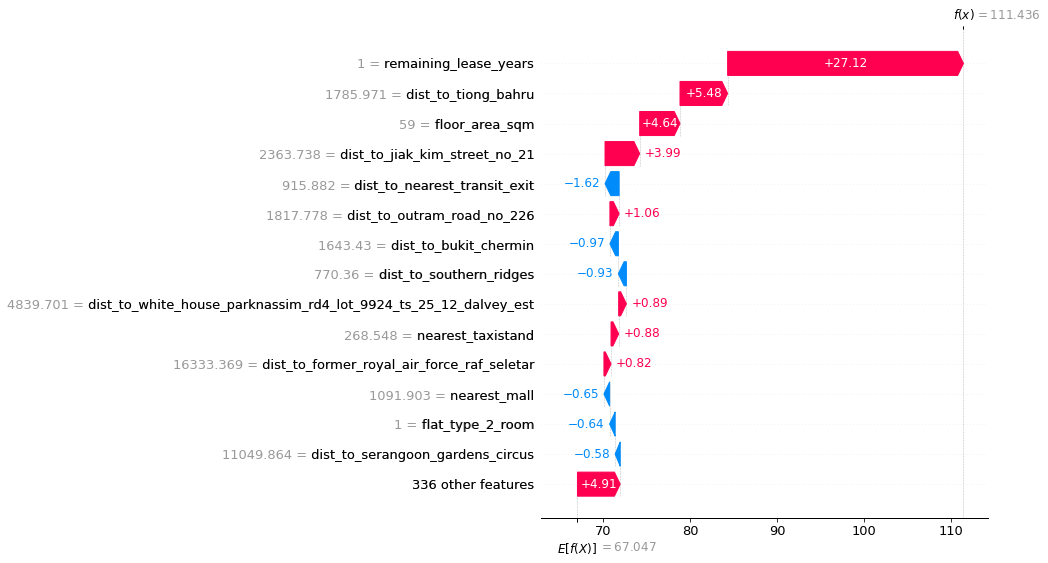

In [48]:
search_params_from_url = pathname.strip("/search-results").split("%")

address = search_params_from_url[0]
print(address)
lon = search_params_from_url[1]
print(lon)
lat = search_params_from_url[2]
flat_type = search_params_from_url[3]
sq_m = search_params_from_url[4]

# features = DatabaseHelpers.features

df = get_address_details(lon, lat, features)
df = prep_data_for_model(address, flat_type, df, sq_m)

path = '../app/assets/model_xgb.pickle.dat'
objec_id_loc = '../app/assets/object_id_dict.pickle'


a, b = predict_price(path, objec_id_loc, df)